## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
# your code here
df = pd.read_csv(r'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')

In [4]:
df.sample(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
356,no checking account,24,no credits taken/all credits paid back duly,car (new),2924,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,guarantor,...,real estate,63,bank,rent,1,skilled employee/official,3 or more,yes (under customer name),no,good
320,... >= 200 DM / salary for at least 1 year,10,no credits taken/all credits paid back duly,others,1597,100 <= ... < 500 DM,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,real estate,40,none,for free,1,unskilled - resident,3 or more,no,yes,good
968,no checking account,45,no credits taken/all credits paid back duly,furniture/equipment,1845,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,real estate,23,none,own,1,skilled employee/official,0 to 2,yes (under customer name),no,bad
382,... >= 200 DM / salary for at least 1 year,60,all credits at this bank paid back duly,others,13756,... >= 1000 DM,>= 7 yrs,25 <= ... < 35,male : married/widowed,none,...,real estate,63,bank,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,good
548,... < 0 DM,12,no credits taken/all credits paid back duly,others,1007,500 <= ... < 1000 DM,1 <= ... < 4 yrs,< 20,female : single,none,...,unknown / no property,22,none,rent,1,skilled employee/official,0 to 2,no,no,good


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
df.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

### Задание 3 (0.5 балла)

In [6]:
df.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['housing'].unique()

array(['for free', 'rent', 'own'], dtype=object)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [9]:
df.groupby(by='purpose')[['amount']].mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [10]:
df[(df['age'] < 30) & (df['housing'] =='rent')].shape[0] / df.shape[0] * 100

24.6

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [11]:
df['number_credits'].unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [12]:
df[(df['foreign_worker'] == 'yes') & ((df['number_credits'].str.contains('4-5')) | (df['number_credits'].str.contains('>=6')))].shape[0]

1

### Задание 6 (1 балл)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

In [14]:
# your code here

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [15]:
df.head(2)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good


AttributeError: Rectangle.set() got an unexpected keyword argument 'rot'

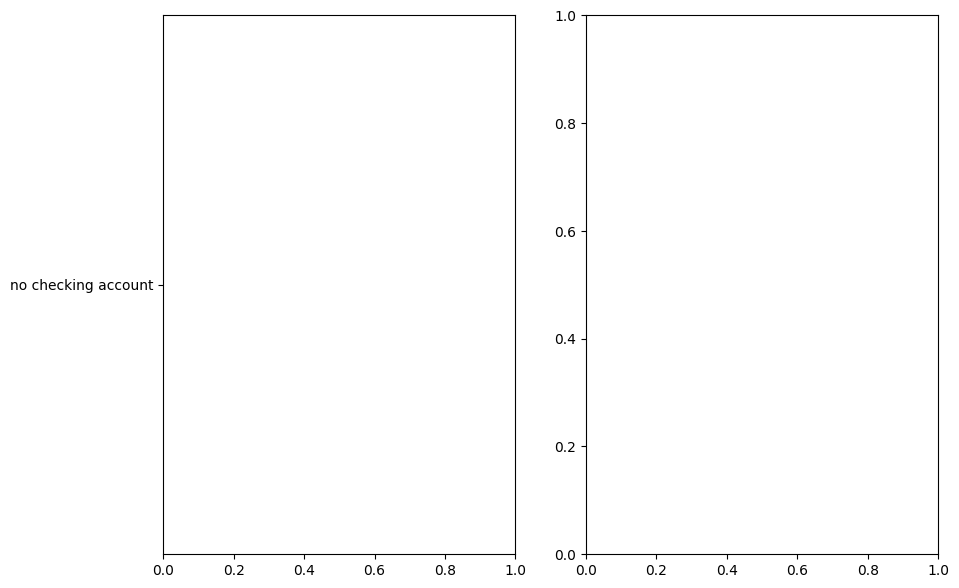

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))

sns.histplot(y = df[df['credit_risk'] == 'good']['status'], color='green', ax=ax[0], rot=90)


plt.tight_layout()
plt.show()

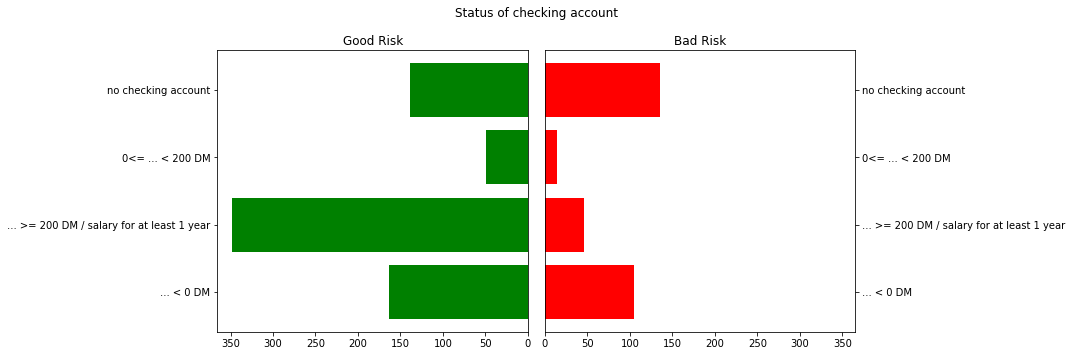

### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

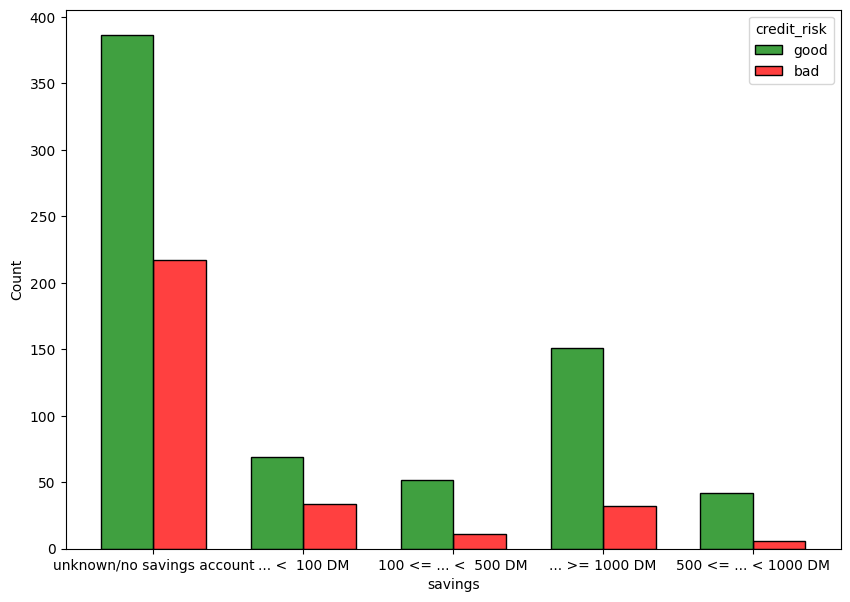

In [17]:
plt.figure(figsize=(10, 7))

sns.histplot(data=df, x='savings', hue='credit_risk', multiple='dodge', shrink=0.7, palette={'good': 'green', 'bad': 'red'})

plt.show()

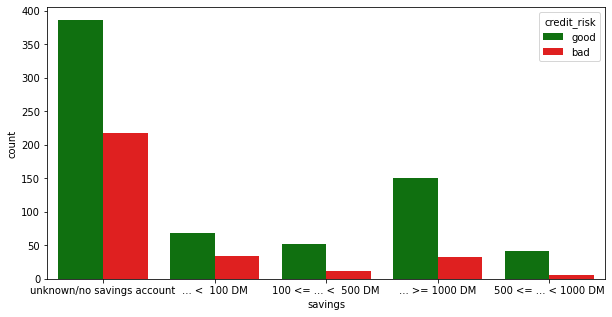

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

In [18]:
df.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good


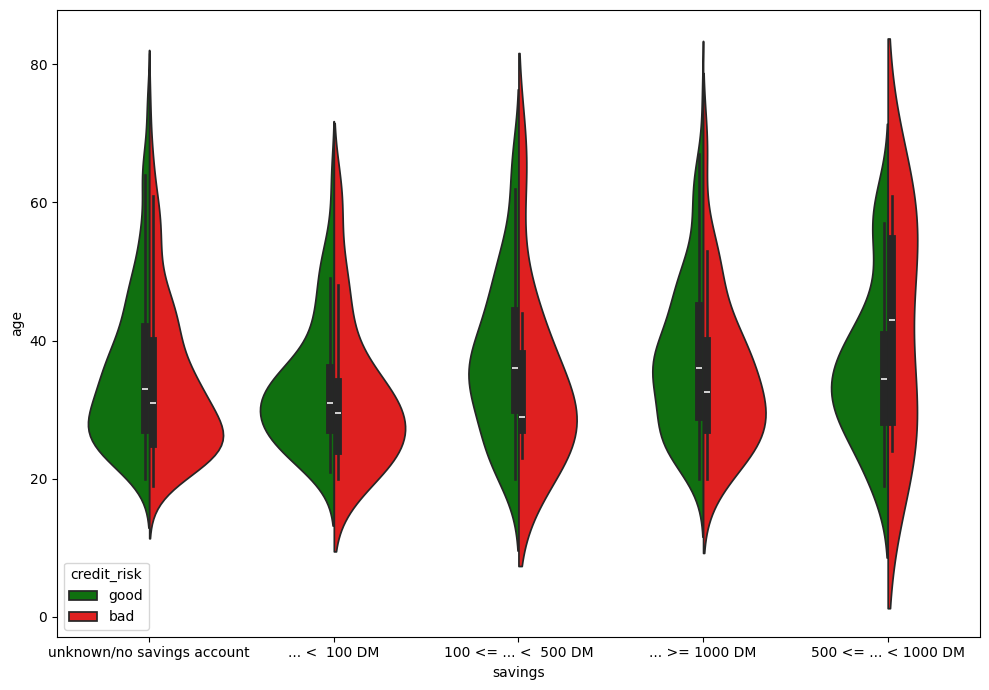

In [27]:
plt.figure(figsize=(10, 7))

sns.violinplot(data=df, x='savings', y='age', hue='credit_risk', palette={'good':'green', 'bad':'red'}, split=True)



# plt.legend(loc=1)
plt.tight_layout()
plt.show()

### Задание 10  (0.5 балла)

In [28]:
df.head(1)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good


Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

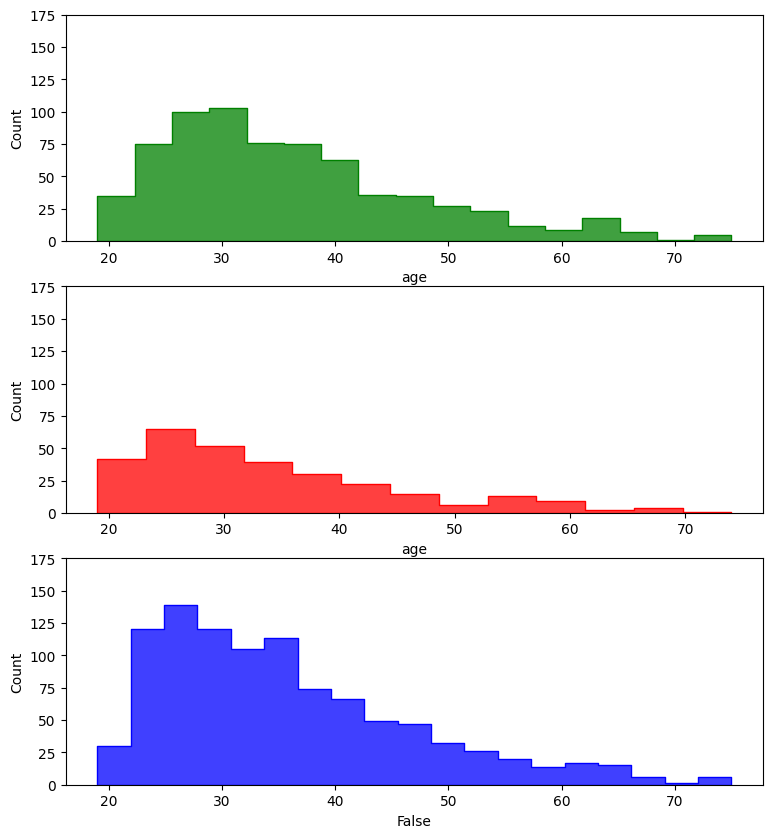

In [60]:
# plt.figure(figsize=(25, 7))
fig, ax = plt.subplots(3, 1, sharey=True, figsize=(9, 10))

sns.histplot(data=df[df['credit_risk'] == 'good'], x='age', color='green', ax=ax[0], element='step')
plt.xlabel(False)
sns.histplot(data=df[df['credit_risk'] == 'bad'], x='age', color='red', ax=ax[1], element='step')
sns.histplot(data=df, x='age', color='blue', ax=ax[2], element='step', legend=True)


# plt.tight_layout()
plt.ylim((0, 175))
plt.show()

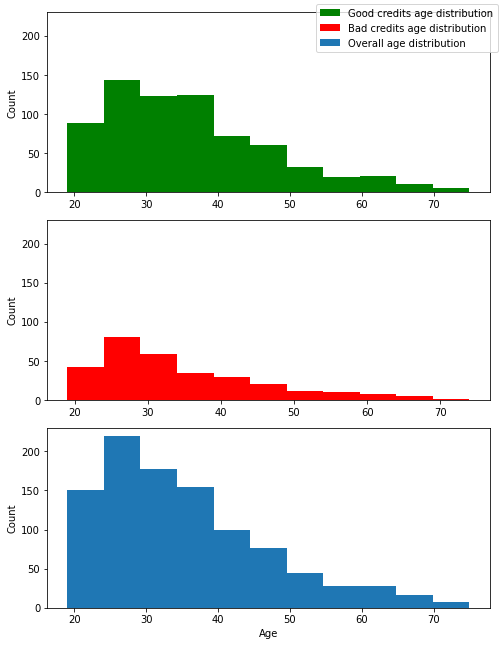

In [ ]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

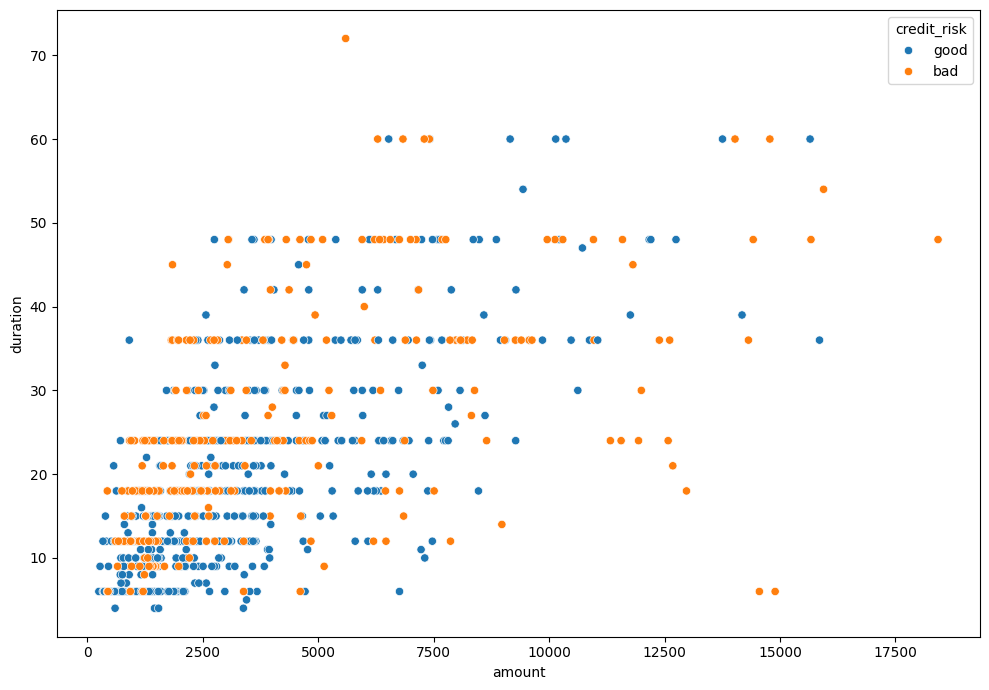

In [69]:
plt.figure(figsize=(10, 7))

sns.scatterplot(data=df, x='amount', y='duration', hue='credit_risk', legend='auto')


plt.tight_layout()
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

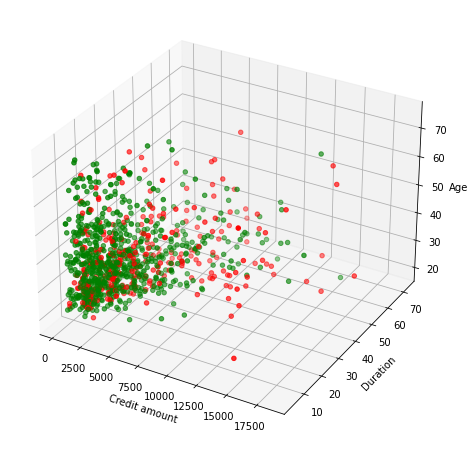

In [ ]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
# your code here

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
def predict(Xtest: np.array) -> np.array:
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))